In [5]:
from fastai.conv_learner import *
import re

In [6]:
arch = resnet50
sz = 256
path = './data/'
bs = 64

In [7]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(path, trn_name='train_oversampled', test_name='test', tfms=tfms)

In [8]:
learn = ConvLearner.pretrained(arch, data, ps=0.5, precompute=True)

100%|██████████| 105/105 [00:39<00:00,  2.63it/s]


In [9]:
learn

Sequential(
  (0): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True)
  (1): Dropout(p=0.5)
  (2): Linear(in_features=4096, out_features=512)
  (3): ReLU()
  (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=512, out_features=12)
  (7): LogSoftmax()
)

### Learning with precompute

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 82/105 [00:02<00:00, 32.63it/s, loss=8.25]


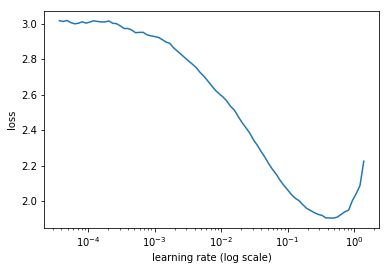

In [10]:
learn.lr_find()
learn.sched.plot()

In [11]:
learn.fit(0.1, 2, cycle_len=5)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      1.321361   0.635457   0.772135  
    1      0.715414   0.528668   0.846354                   
    2      0.46415    0.404285   0.873698                    
    3      0.348918   0.367824   0.890625                   
    4      0.309192   0.352968   0.886719                    
    5      0.423275   0.380712   0.848958                    
    6      0.330104   0.36686    0.882812                    
    7      0.2648     0.288216   0.908854                   
    8      0.22415    0.2569     0.897135                   
    9      0.192358   0.313324   0.907552                    



[0.313324, 0.9075520833333334]

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 66%|██████▌   | 42/64 [00:01<00:00, 30.00it/s, loss=1.38] 


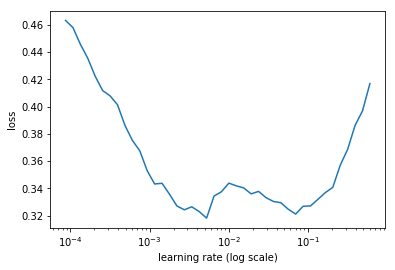

In [10]:
learn.lr_find()
learn.sched.plot()

In [12]:
learn.fit(0.0001, 2, cycle_len=5)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.277133   0.321477   0.877604  
    1      0.24893    0.380031   0.901042                  
    2      0.235564   0.37468    0.903646                  
    3      0.239004   0.32112    0.904948                  
    4      0.230825   0.38689    0.902344                  
    5      0.256329   0.321435   0.904948                  
    6      0.23412    0.331247   0.901042                  
    7      0.249679   0.39337    0.894531                  
    8      0.261166   0.349024   0.89974                   
    9      0.243042   0.319184   0.897135                  



[0.31918383, 0.8971354166666666]

### Learn with data augmentation

In [12]:
learn.precompute = False

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 91%|█████████▏| 96/105 [00:42<00:03,  2.29it/s, loss=2.98] 

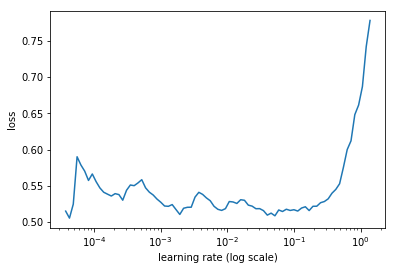

In [13]:
learn.lr_find()
learn.sched.plot()

In [14]:
learn.fit(0.0001, 1, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

 16%|█▌        | 17/105 [00:08<00:45,  1.95it/s, loss=0.498]

Exception in thread Thread-18:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.561649   0.252182   0.910156  
    1      0.515461   0.252049   0.90625                     
    2      0.51042    0.250009   0.907552                    



[0.25000903, 0.9075520833333334]

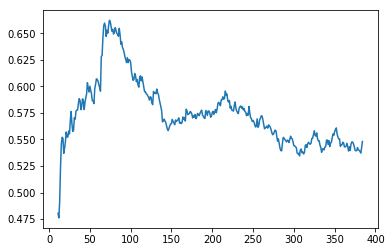

In [16]:
learn.sched.plot_loss()

## Learn with unfreezing the layers

In [15]:
learn.unfreeze()
# learn.bn_freeze(True)

In [18]:
learn.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/64 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1512387374934/work/torch/lib/THC/generic/THCStorage.cu:58

In [22]:
learn.fit([1e-5, 1e-4, 1e-3], 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.083828   0.100154   0.971354  
    1      0.082544   0.09679    0.972656                     
    2      0.085204   0.096694   0.973958                     
    3      0.088126   0.094768   0.971354                     
    4      0.086221   0.095087   0.972656                     
    5      0.085385   0.094223   0.971354                     
  8%|▊         | 8/105 [00:08<01:43,  1.07s/it, loss=0.0839]

KeyboardInterrupt: 

In [25]:
len(data.trn_ds.fnames)

6687

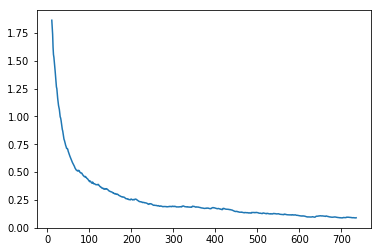

In [17]:
learn.sched.plot_loss()

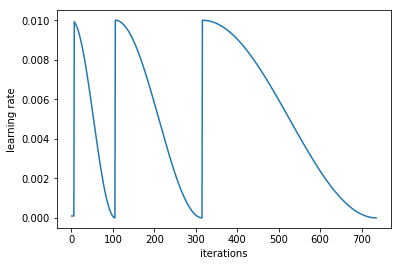

In [18]:
learn.sched.plot_lr()

In [27]:
submit(learn)

                                                            
0.97607


In [38]:
# learn.save('Resnet50-0.98110') # This is the one with 512 neurons in fc and 0.5 dropout rate

## Checking the results

## Make Submission

In [26]:
def submit(learn):
    log_probs = learn.TTA(is_test=True, n_aug=12)
    probs = np.exp(log_probs[0])
    probs = np.mean(probs, axis=0)
    preds = np.argmax(probs, axis=1)
    pred_classes = list(map(lambda x: learn.data.classes[x], preds))
    fnames = list(map(lambda x: re.split('/', x)[1], learn.data.test_ds.fnames))
    
    df = pd.DataFrame({'file': fnames, 'species': pred_classes})
    df.to_csv(f'{path}results/results.csv', index=False)
    !kg submit {path}results/results.csv

In [85]:
FileLink(f'{path}results/results.csv')

/home/paperspace/kaggle/plant-seedlings-classification/data/results/results.csv